In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
%matplotlib inline
import numpy as np
import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3]

from graficaMLP import dibuPtos_y_2Rectas
from Funciones import evaluar, evaluarDerivada

In [3]:
X = np.array([ [-1, -1], [-1, 1], [1, -1], [1, 1]])
Y = np.array([-1, 1, 1, -1]).reshape(-1,1)

nFilas = X.shape[0]
entradas = X.shape[1]
ocultas = 2
salidas = Y.shape[1]

print(X)
print(Y)


[[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]]
[[-1]
 [ 1]
 [ 1]
 [-1]]


In [4]:
e=0
X[e:e+1,:].shape

(1, 2)

In [5]:
FunH = 'sigmoid'
FunO = 'tanh'

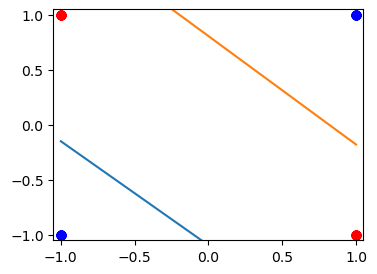

In [22]:
plt.clf()
# Inicializamos los pesos con valores aleatorios
W1 = np.random.uniform(-1,1,[ocultas, entradas])
b1 = np.random.uniform(-1,1, [ocultas,1])
W2 = np.random.uniform(-1,1,[salidas, ocultas])
b2 = np.random.uniform(-1,1, [salidas,1])

alfa = 0.15
CotaError = 1.0e-4
MAX_ITERA = 500
ite = 0
errorAnt = 0
AVGError = 1
errores = []
ph=0
while ( abs(AVGError-errorAnt) > CotaError ) and ( ite < MAX_ITERA ):
    errorAnt = AVGError
    AVGError = 0
    for e in range(nFilas):  #para cada ejemplo

        xi = X[e:e+1, :]     # ejemplo a ingresar a la red

        # propagar el ejemplo hacia adelante
        netasH = W1 @ xi.T + b1
        salidasH = evaluar(FunH, netasH)
        netasO = W2 @ salidasH + b2
        salidasO = evaluar(FunO, netasO)

        # calcular los gradientes en ambas capas        
        ErrorSalida = Y[e]-salidasO
        deltaO = ErrorSalida * evaluarDerivada(FunO,salidasO)
        deltaH = evaluarDerivada(FunH,salidasH)*(W2.T @ deltaO)

        # corregir todos los pesos      
        W1 = W1 + alfa * deltaH @ xi 
        b1 = b1 + alfa * deltaH 
        W2 = W2 + alfa * deltaO @ salidasH.T 
        b2 = b2 + alfa * deltaO 

        AVGError = AVGError + np.mean(ErrorSalida**2)
    
    AVGError = AVGError / nFilas
    errores.append(AVGError)
    
    ite = ite + 1
    
    # Graficar las rectas
    if (ite % 10) ==0:
        ph = dibuPtos_y_2Rectas(X,Y, W1, b1, ph)    


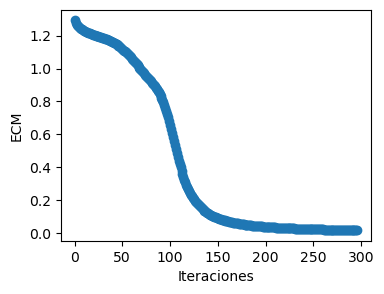

In [7]:
plt.clf()
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()